# Week 2 - Topic Modeling - Learning about Latent Dirichlet Allocation

------

## Part 1

This is an extra notebook, for you to learn some other concepts about LDA. This notebook was originally designed  for the last class of Data Sciences for Mobility in 2018, so you may find some things that you had already done in earlier notebooks. We point you particularly to the last section, that helps understand the concept of a Dirichlet distribution. 


We start by the usual imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

LDA is in fact fully implemented in sklearn, so we can import it!

In order to use it, one needs to convert the documents into a Bag-of-Words representation. The object CountVectorizer does that, so let's import that too

In [2]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer



Our dataset comes - suprise - from New York City. This time, we will focus on a multi-purpose indoor arena in the New York City borough of Brooklyn: the Barclay's center. 

We have collected a very long dataset for you. This dataset has about 800 events, including sports, music, circus, and so on. Notice that it's in tsv format ("tab" is used instead of commas, to separate fields). So we open it in a particular way

In [3]:
f=pd.read_csv("barclays_events_preprocessed.tsv", sep="\t", index_col=0) #index_col=0 is used because we can use the first column as the index 

In [4]:
f=f.dropna()   #There are some events without description. It doesn't make sense to use them now...

Take a careful look at this file. 

We need to create our Bag-of-Words representation (BoW). Here's how

In [5]:
vectorizer=CountVectorizer(stop_words='english') #create a CountVectorizer object. stop_words is a list a of words that are 
                                                 #irrelevant (for example, at, in, on, are, be, have...)


As many other objects in Sklearn, CountVectorizer is applied with the function fit_transform

In [6]:
descriptions_bow=vectorizer.fit_transform(f['description'])   #creates a BoW representation
description_vocabulary = vectorizer.get_feature_names()  #gets the words that correspond to each element of the BoW

This can be confusing. Check carefully the content of the variables you just created

It is finally time to run our LDA! 

Guess what, it's the usual process!

In [7]:
lda=LatentDirichletAllocation(n_components=10, learning_method='batch')
x=lda.fit_transform(descriptions_bow)

It's important to understand well both objects, x and lda. Check them carefully... for example, check what methods are available in the lda object. And check the dimensionality of x. What does it mean?

We copied the following code from an example in the Sklearn website. What does it do?

In [8]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

Try to use it... We will help you by giving an example

In [9]:
n_top_words=12
print_top_words(lda, description_vocabulary, n_top_words)

Topic #0: york special new check hotel code bridge rate marriott promotional corporate visit
Topic #1: scr adroll document session oldonload http wwe meet com function id host
Topic #2: game net point bull lopez brook chicago won yes season ha click
Topic #3: click follow disney ice new com american calling express box office group
Topic #4: event world july 30pm available 00pm bk music box new varekai performance
Topic #5: calling make reservation click event emailprotected dinner today american emailing express menu
Topic #6: game champion basketball conference nba atlantic championship home matchup day net available
Topic #7: group november 00pm event bk game purchase calling pricing american classic express
Topic #8: album tour ha artist band music jay new year song grammy concert
Topic #9: lirr circus schedule train check service time world space family earth app



Congrats! You implemented your first Topic Model!  :-)

Check carefully the topics above. What kind of event may be associated with each one?

----------------------

## Part 2 - Using your Topic Model

Before even using your topic model in regression, you can do some exploratory analysis

How about implementing an MDS model and visualizing it? Do you want to try?

----------------

## Part 3 - Find the right number of topics

Plot the elbow function to find the best choice for K

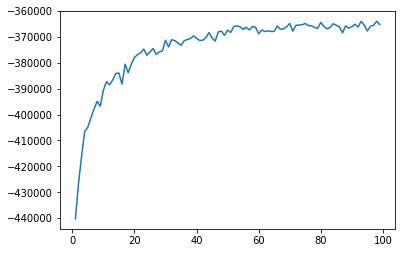

In [20]:
scores=[]

for k in range(1, 100):
    lda=LatentDirichletAllocation(n_components=k, learning_method='batch')
    lda.fit(descriptions_bow)
    scores.append(lda.score(descriptions_bow))
plt.plot(range(1,100), scores)

What is the best choice of K for you?

--------


## Part 4 - Understanding distributions (optional)

It is common to find very abstract concepts, somewhat confusing, in a statistics or machine learning class. The best way for you to learn, is really to play with them as much as you can. For now, let's just focus on the Dirichlet distribution

It is available as numpy.random.dirichlet(alpha, size=None)

...so, try it! For example, obtain draws from this distribution using different values of alpha.

In [25]:
'''Function to plot points in a simplex'''

# Based on post from Thomas Boggs (http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/)

import matplotlib.tri as tri

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])

def plot_points(X):
    '''Plots a set of points in the simplex.

    Arguments:

        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
    '''
    
    X = X.dot(_corners)  #This is what converts the original points onto the simplex (it projects on it, through dot product)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.triplot(_triangle, linewidth=1)

Whenever you can, try to visualize it. Remember what we did in the slides. Try to do the same thing!

**feel free to use the function below, to plot points from a dirichlet distribution, onto a 2D simplex**

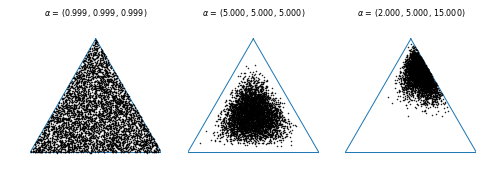

In [27]:
f = plt.figure(figsize=(8, 6))
alphas = [[0.999] * 3,
          [5] * 3,
          [2, 5, 15]]
for (i, alpha) in enumerate(alphas):
    plt.subplot(2, len(alphas), i + 1)
    dist = np.random.dirichlet(alpha, size=5000)
    title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
    plt.title(title, fontdict={'fontsize': 8})
    plot_points(dist)
